In [ ]:
#Solo correr en Deepnote
# import os
# path = r'/work/online_retail_analysis'
# os.chdir(path)
# !pip install --editable .
# !pip install pyprojroot
# !pip install openpyxl

In [139]:
%load_ext autoreload
%autoreload 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [140]:
import online_retail_analysis.utils.paths as path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.cluster import MiniBatchKMeans as KMeans

# sns.set_style("whitegrid")
%matplotlib inline
pd.options.display.float_format = '{:,.3f}'.format

In [141]:
df_proces = pd.read_csv(path.data_processed_dir('data_clean.csv'))
df_proces['InvoiceDate']= pd.to_datetime(df_proces['InvoiceDate'])

In [142]:
from online_retail_analysis.features.build_features import Calculate_RFMV , score_rfmv

df_rfm = Calculate_RFMV(df_proces, 'StockCode')
df_rfm_score = score_rfmv(df_rfm)
df_rfm_score

,Recency,MonetaryValue,Frequency,Total_Score
StockCode,,,,
10002,235,504.050,49,6
10080,18,118.040,21,6
10120,5,80.640,29,5
10123C,253,3.250,3,3
10124A,33,6.720,5,4
...,...,...,...,...
C2,5,"1,139.000",133,8
DOT,4,136.000,16,7
M,1,"2,070.290",279,12


In [143]:
df = pd.merge(df_rfm_score,df_proces,on="StockCode")
# df.head()
df.info()
# df[df['StockCode']=='10002']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392692 entries, 0 to 392691
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   StockCode      392692 non-null  object        
 1   Recency        392692 non-null  int64         
 2   MonetaryValue  392692 non-null  float64       
 3   Frequency      392692 non-null  int64         
 4   Total_Score    392692 non-null  int64         
 5   InvoiceNo      392692 non-null  int64         
 6   Description    392692 non-null  object        
 7   Quantity       392692 non-null  float64       
 8   InvoiceDate    392692 non-null  datetime64[ns]
 9   UnitPrice      392692 non-null  float64       
 10  CustomerID     392692 non-null  float64       
 11  Country        392692 non-null  object        
 12  date           392692 non-null  object        
 13  month          392692 non-null  int64         
 14  days           392692 non-null  object        
 15  

In [147]:
ratings = df.groupby('Description')['Total_Score'].describe().reset_index()
ratings.head()
ratings = ratings.sort_values(['count','mean'], ascending=False) 
ratings.head(10)


,Description,count,mean,std,min,25%,50%,75%,max
3698,WHITE HANGING HEART T-LIGHT HOLDER,"2,016.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
2767,REGENCY CAKESTAND 3 TIER,"1,713.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
1762,JUMBO BAG RED RETROSPOT,"1,615.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
216,ASSORTED COLOUR BIRD ORNAMENT,"1,395.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
2345,PARTY BUNTING,"1,389.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
1943,LUNCH BAG RED RETROSPOT,"1,303.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
3001,SET OF 3 CAKE TINS PANTRY DESIGN,"1,152.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
2611,POSTAGE,"1,099.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
1935,LUNCH BAG BLACK SKULL.,"1,078.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000
2269,PACK OF 72 RETROSPOT CAKE CASES,"1,050.000",12.000,0.000,12.000,12.000,12.000,12.000,12.000


<Figure size 1440x576 with 0 Axes>

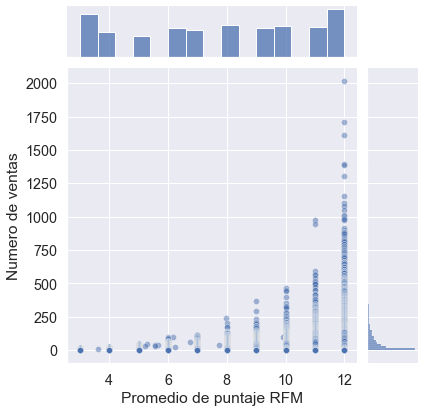

In [157]:
plt.figure(figsize=(20,8))
sns.set(font_scale = 1.3)

h = sns.jointplot(x='mean',y='count',data=ratings,alpha=0.5,kind='scatter')
h.ax_joint.set_xlabel('Promedio de puntaje RFM')
h.ax_joint.set_ylabel('Numero de ventas')
# h.ax_joint.set_title('Numero de clientes')
# plt.title('Boxplot de cluster por Recency', fontsize =15)

# plt.xlabel('Promedio de puntaje RFM',fontsize =15)

# plt.ylabel('Numero de clientes', fontsize =15)
# p.set(xlabel='Promedio de puntaje RFM', ylabel='Numero de clientes',title="Numero de clientes por puntaje") 

plt.savefig(path.reports_figures_dir('N_Costumer_RS.png'), format='png', dpi=1000)

In [146]:
feature_df = df.pivot_table(index='StockCode',columns='CustomerID',values='Total_Score').fillna(0)
feature_df.head()

CustomerID,"12,346.000","12,347.000","12,348.000","12,349.000","12,350.000","12,352.000","12,353.000","12,354.000","12,355.000","12,356.000",...,"18,273.000","18,274.000","18,276.000","18,277.000","18,278.000","18,280.000","18,281.000","18,282.000","18,283.000","18,287.000"
StockCode,,,,,,,,,,,,,,,,,,,,,
10002,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10080,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10120,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10123C,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
10124A,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [ ]:
Corr_Matrix=feature_df.T.corr()

def Corr_matrix_suggestions(product_stockCode):
    suggestions = Corr_Matrix[product_stockCode].sort_values(ascending=False)
    return suggestions
Corr_Matrix.head()

In [ ]:
stockCode = Corr_matrix_suggestions("10002")
stockCode = stockCode.reset_index()
stockCode
# df[['CustomerID','Description','StockCode']].nunique()
merge = df[['CustomerID','Description','StockCode']].merge(stockCode.reset_index(),how='inner',on='StockCode')#left_index=True, right_index=True
merge = merge.sort_values('10002',ascending=False)
merge = merge[merge['10002']!=1]
merge.head(10)

In [158]:
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors


In [159]:
distances=['manhattan','minkowski','cosine']
feature_df_matrix = csr_matrix(feature_df.values)
for i in distances:

  model_knn = NearestNeighbors(metric =str(i), algorithm = 'brute')
  model_knn.fit(feature_df_matrix)

  distances, indices = model_knn.kneighbors(feature_df.iloc[0,:].values.reshape(1, -1), n_neighbors = 6)

  print("\nCalculating Reccomendations by " + str(i) + " distance metric ")
  
  for j in range(0,len(distances.flatten())):
    if j == 0 :
      print("\nRecommendations for Product : " , feature_df.index[0])
    else:
      print(j , ":" , feature_df.index[indices.flatten()[j]] , "with " + str(i) + " distance of" , round(distances.flatten()[j],3))


Calculating Reccomendations by manhattan distance metric 

Recommendations for Product :  10002
1 : 90103 with manhattan distance of 232.0
2 : 90059F with manhattan distance of 236.0
3 : 90059C with manhattan distance of 236.0
4 : 90059B with manhattan distance of 236.0
5 : 90059E with manhattan distance of 236.0

Calculating Reccomendations by minkowski distance metric 

Recommendations for Product :  10002
1 : 90103 with minkowski distance of 37.094
2 : 90059E with minkowski distance of 37.31
3 : 90059C with minkowski distance of 37.31
4 : 90101 with minkowski distance of 37.31
5 : 90059F with minkowski distance of 37.31

Calculating Reccomendations by cosine distance metric 

Recommendations for Product :  10002
1 : 90103 with cosine distance of 0.776
2 : 21826 with cosine distance of 0.802
3 : 90101 with cosine distance of 0.817
4 : 90059E with cosine distance of 0.817
5 : 16010 with cosine distance of 0.817


In [160]:
model_knn = NearestNeighbors(metric ='cosine', algorithm = 'brute')
model_knn.fit(feature_df_matrix)
distances, indices = model_knn.kneighbors(feature_df.iloc[0,:].values.reshape(1, -1), n_neighbors = 10)

stockCode=[]
cosine=[]
for i in range(0,len(distances.flatten())):
    if i == 0 :
        print("Recommendations for Product : " , feature_df.index[0])
    else:
        stockCode.append(feature_df.index[indices.flatten()[i]])
        cosine.append(distances.flatten()[i])
        recommendation = pd.DataFrame({"StockCode" : stockCode , "Distance" : cosine })

recommendation=recommendation.sort_values(by='Distance', ascending=False, ignore_index= True)
recommendation

Recommendations for Product :  10002


,StockCode,Distance
0,84535A,0.819
1,90101,0.817
2,90059E,0.817
3,16010,0.817
4,90059C,0.817
5,90059F,0.817
6,90059B,0.817
7,21826,0.802
8,90103,0.776


#### Este puntaje de similitud de coseno varía de 0 a 1, siendo 0 el más bajo (el menos similar) y 1 el más alto (el más similar).

In [161]:
# df[['CustomerID','Description','StockCode']].nunique()
merge = df[['CustomerID','Description','StockCode']].merge(recommendation,how='inner',on='StockCode')#left_index=True, right_index=True
merge

,CustomerID,Description,StockCode,Distance
0,"12,748.000",FOLDING CAMPING SCISSOR W/KNIF & S,16010,0.817
1,"17,337.000",FOLDING CAMPING SCISSOR W/KNIF & S,16010,0.817
2,"15,068.000",FOLDING CAMPING SCISSOR W/KNIF & S,16010,0.817
3,"14,078.000",EIGHT PIECE DINOSAUR SET,21826,0.802
4,"12,748.000",EIGHT PIECE DINOSAUR SET,21826,0.802
...,...,...,...,...
56,"14,076.000",WHITE FRANGIPANI NECKLACE,90101,0.817
57,"14,911.000",WHITE FRANGIPANI NECKLACE,90101,0.817
58,"12,748.000",WHITE FRANGIPANI NECKLACE,90101,0.817
59,"14,911.000",PURPLE FRANGIPANI NECKLACE,90103,0.776


#### aqui tenemos las personas a quien le haremos la recomendacion de los productos si compran el item 10002 que hace referencia a 'INFLATABLE POLITICAL GLOBE'


In [164]:
merge.sample(10)

,CustomerID,Description,StockCode,Distance
27,"14,504.000",ENGLISH ROSE NOTEBOOK A6 SIZE,84535A,0.819
13,"18,008.000",EIGHT PIECE DINOSAUR SET,21826,0.802
51,"12,748.000",DIAMANTE HAIR GRIP PACK/2 RUBY,90059E,0.817
17,"17,994.000",EIGHT PIECE DINOSAUR SET,21826,0.802
32,"14,546.000",ENGLISH ROSE NOTEBOOK A6 SIZE,84535A,0.819
50,"14,911.000",DIAMANTE HAIR GRIP PACK/2 RUBY,90059E,0.817
25,"14,505.000",ENGLISH ROSE NOTEBOOK A6 SIZE,84535A,0.819
52,"17,596.000",DIAMANTE HAIR GRIP PACK/2 LT ROSE,90059F,0.817
54,"12,748.000",DIAMANTE HAIR GRIP PACK/2 LT ROSE,90059F,0.817
43,"17,968.000",DIAMANTE HAIR GRIP PACK/2 BLACK DIA,90059B,0.817


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2ad5389b-d0fe-4f26-b030-dadc57d353b7' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>